In [1]:
!pip install pycocotools
import os
from pycocotools.coco import COCO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 11.6 MB/s eta 0:00:0000:01


In [2]:
dataDir = '/kaggle/input/coco-image-caption'
dataType = 'val2017'  # or 'train2017' for training data

instances_annFile = os.path.join(dataDir, 'annotations_trainval2017/annotations/instances_{}.json'.format(dataType))
captions_annFile = os.path.join(dataDir, 'annotations_trainval2017/annotations/captions_{}.json'.format(dataType))

# Check if the paths are correct
print(os.path.exists(instances_annFile))  # Should return True
print(os.path.exists(captions_annFile))   # Should return True


True
True


In [3]:
# Initialize COCO API for instance annotations
coco = COCO(instances_annFile)

# Initialize COCO API for caption annotations
coco_caps = COCO(captions_annFile)

# Get image ids
ids = list(coco.anns.keys())
print(f"Number of annotations: {len(ids)}")


loading annotations into memory...
Done (t=0.96s)
creating index...
index created!
loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
Number of annotations: 36781


http://images.cocodataset.org/val2017/000000563604.jpg


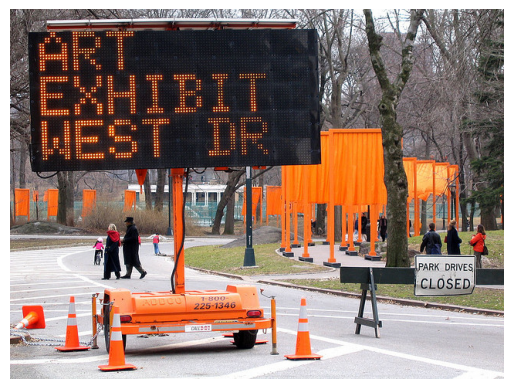

A sign outside of a closed road redirecting traffic
There is an electronic sign next to a road sign.
A street with a mechanical sign with directions. 
a electric sign sits next to a park 
Signs are blocking off a street for an art exhibit.


In [4]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [5]:
!pip install nltk
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Caption: A sign outside of a closed road redirecting traffic
Tokens: ['a', 'sign', 'outside', 'of', 'a', 'closed', 'road', 'redirecting', 'traffic']
Caption: There is an electronic sign next to a road sign.
Tokens: ['there', 'is', 'an', 'electronic', 'sign', 'next', 'to', 'a', 'road', 'sign', '.']
Caption: A street with a mechanical sign with directions. 
Tokens: ['a', 'street', 'with', 'a', 'mechanical', 'sign', 'with', 'directions', '.']
Caption: a electric sign sits next to a park 
Tokens: ['a', 'electric', 'sign', 'sits', 'next', 'to', 'a', 'park']
Caption: Signs are blocking off a street for an art exhibit.
Tokens: ['signs', 'are', 'blocking', 'off', 'a', 'street', 'for', 'an', 'art', 'exhibit', '.']

Most common words:
[('a', 8), ('sign', 5), ('.', 3), ('road', 2), ('an', 2), ('next', 2), ('to', 2), ('street', 2), ('with', 2), ('outside', 1)]


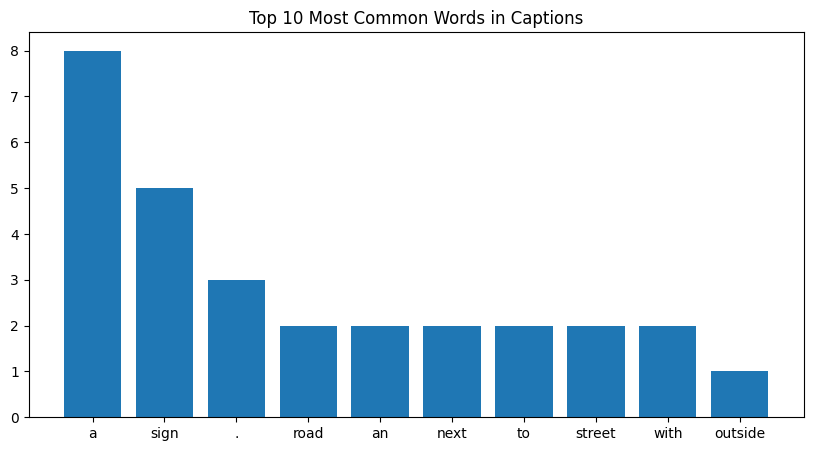

In [6]:
# Continue after displaying the captions

from nltk.tokenize import word_tokenize

# Tokenize the captions
for ann in anns:
    caption = ann['caption']
    tokens = word_tokenize(caption.lower())  # Tokenizing each caption and converting to lowercase
    print(f"Caption: {caption}")
    print(f"Tokens: {tokens}")

# Collect all tokens to analyze word frequency
from collections import Counter

all_tokens = []
for ann in anns:
    caption = ann['caption']
    tokens = word_tokenize(caption.lower())
    all_tokens.extend(tokens)

# Count word frequencies
word_freq = Counter(all_tokens)
print(f"\nMost common words:\n{word_freq.most_common(10)}")

# Visualize the word frequencies
words, counts = zip(*word_freq.most_common(10))
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words in Captions')
plt.show()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Caption: A sign outside of a closed road redirecting traffic
Preprocessed Tokens: ['sign', 'outside', 'closed', 'road', 'redirecting', 'traffic']
Caption: There is an electronic sign next to a road sign.
Preprocessed Tokens: ['electronic', 'sign', 'next', 'road', 'sign']
Caption: A street with a mechanical sign with directions. 
Preprocessed Tokens: ['street', 'mechanical', 'sign', 'directions']
Caption: a electric sign sits next to a park 
Preprocessed Tokens: ['electric', 'sign', 'sits', 'next', 'park']
Caption: Signs are blocking off a street for an art exhibit.
Preprocessed Tokens: ['signs', 'blocking', 'street', 'art', 'exhibit']

Most common preprocessed words:
[('sign', 5), ('road', 2), ('next', 2), ('street', 2), ('outside', 1), ('closed', 1), ('redirecting', 1), ('traffic', 1), ('electronic', 1), ('mechanical', 1)]


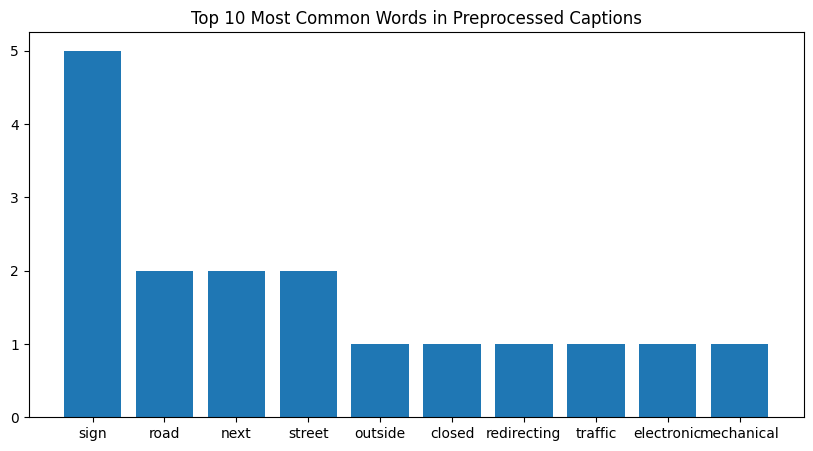

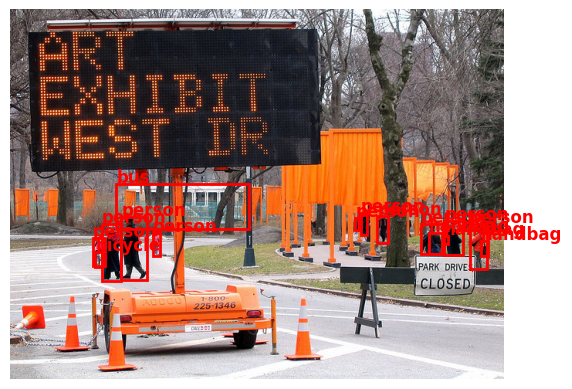


Objects detected in the image:
- bicycle
- person
- person
- person
- person
- person
- person
- handbag
- handbag
- person
- person
- person
- person
- bus
- handbag

Relationship between objects and captions:

Caption: A sign outside of a closed road redirecting traffic
Objects mentioned in caption:
  - bicycle (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - handbag (not mentioned)
  - handbag (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - bus (not mentioned)
  - handbag (not mentioned)

Caption: There is an electronic sign next to a road sign.
Objects mentioned in caption:
  - bicycle (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - handbag

In [7]:
import string
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize the captions and remove punctuation and stopwords
def preprocess_caption(caption):
    tokens = word_tokenize(caption.lower())  # Tokenize and lowercase
    tokens = [word for word in tokens if word not in string.punctuation]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Preprocess and display the captions
for ann in anns:
    caption = ann['caption']
    tokens = preprocess_caption(caption)
    print(f"Caption: {caption}")
    print(f"Preprocessed Tokens: {tokens}")

# Collect all tokens after preprocessing
preprocessed_tokens = []
for ann in anns:
    caption = ann['caption']
    tokens = preprocess_caption(caption)
    preprocessed_tokens.extend(tokens)

# Count word frequencies again after preprocessing
word_freq_preprocessed = Counter(preprocessed_tokens)
print(f"\nMost common preprocessed words:\n{word_freq_preprocessed.most_common(10)}")

# Visualize the word frequencies after preprocessing
words, counts = zip(*word_freq_preprocessed.most_common(10))
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words in Preprocessed Captions')
plt.show()

# Visualize the objects in the image using bounding boxes
# Get all annotation IDs for the image (objects)
annIds_objects = coco.getAnnIds(imgIds=img['id'], iscrowd=False)
anns_objects = coco.loadAnns(annIds_objects)

# Visualize the image with bounding boxes
plt.imshow(I)
plt.axis('off')

# Loop over each object annotation to draw bounding boxes
for obj in anns_objects:
    bbox = obj['bbox']  # [x, y, width, height]
    category_id = obj['category_id']
    category = coco.loadCats(category_id)[0]['name']  # Get the category name (e.g., "person", "dog")

    # Draw bounding box (x, y, width, height)
    rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor='red', linewidth=2)
    plt.gca().add_patch(rect)
    
    # Label each object with its category name
    plt.text(bbox[0], bbox[1] - 2, category, color='red', fontsize=12, weight='bold')

plt.show()

# Display the objects detected in the image
print("\nObjects detected in the image:")
for obj in anns_objects:
    category = coco.loadCats(obj['category_id'])[0]['name']
    print(f"- {category}")

# Explore relationships between objects and captions (basic)
print("\nRelationship between objects and captions:")
for ann in anns:
    caption = ann['caption']
    print(f"\nCaption: {caption}")
    print("Objects mentioned in caption:")
    for obj in anns_objects:
        category = coco.loadCats(obj['category_id'])[0]['name']
        if category in caption.lower():
            print(f"  - {category} (mentioned)")
        else:
            print(f"  - {category} (not mentioned)")


In [36]:
import requests
from PIL import Image
from io import BytesIO
from torch.utils.data import Dataset

from torch.utils.data import Dataset
import torch

# In the COCODataset class
class COCODataset(Dataset):
    def __init__(self, coco, coco_caps, transform=None):
        self.coco = coco
        self.coco_caps = coco_caps
        self.ids = list(coco.anns.keys())  # Image annotation IDs
        self.transform = transform
    
    def __len__(self):
        return len(self.ids)  # Number of annotations

    def __getitem__(self, idx):
        ann_id = self.ids[idx]
        img_id = self.coco.anns[ann_id]['image_id']
        img = self.coco.loadImgs(img_id)[0]

        # Fetch the image from the URL with error handling
        try:
            url = img['coco_url']
            response = requests.get(url)
            response.raise_for_status()  # Raise an error for bad HTTP responses
            I = Image.open(BytesIO(response.content)).convert("RGB")
        except requests.RequestException as e:
            print(f"Failed to fetch image {img_id} from {url}: {e}")
            return None, None
        except Exception as e:
            print(f"Error processing image {img_id}: {e}")
            return None, None

        # Apply transformations
        if self.transform:
            I = self.transform(I)

        # Get caption
        annIds = self.coco_caps.getAnnIds(imgIds=img_id)
        anns = self.coco_caps.loadAnns(annIds)
        if len(anns) > 0:
            caption = anns[0]['caption']  # Use first caption (or modify for multi-caption use)
        else:
            caption = ""  # Handle the case where no captions are available

        # Debug print statements
        #print('[INFO] Image type:', type(I))
        #print('[INFO] Caption type:', type(caption))

        return I, caption


In [37]:
import torch.nn as nn
import torchvision.models as models

class CNN_Encoder(nn.Module):
    def __init__(self, embed_size):
        super(CNN_Encoder, self).__init__()
        resnet = models.resnet50(pretrained=True)  # Load pre-trained ResNet
        modules = list(resnet.children())[:-1]  # Remove the last fully connected layer
        self.resnet = nn.Sequential(*modules)
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)  # Add a fully connected layer
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)
        
    def forward(self, images):
        with torch.no_grad():
            features = self.resnet(images)  # Extract features from the ResNet
        features = features.view(features.size(0), -1)  # Flatten the features
        features = self.bn(self.linear(features))  # Pass through the fully connected layer
        return features

# Initialize the CNN encoder with the embedding size
embed_size = 256  # You can change this depending on your task
encoder = CNN_Encoder(embed_size).to('cuda' if torch.cuda.is_available() else 'cpu')


In [38]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pack_padded_sequence

# Define the RNN Decoder
class RNN_Decoder(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers=1):
        super(RNN_Decoder, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seg_length = 20  # Maximum caption length

    def forward(self, features, captions, lengths):
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1)
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True, enforce_sorted=False)
        hiddens, _ = self.lstm(packed)
        outputs = self.linear(hiddens[0])
        return outputs

    def sample(self, features, states=None):
        "Generate captions for the image features using greedy search"
        sampled_ids = []
        inputs = features.unsqueeze(1)
        for i in range(self.max_seg_length):
            hiddens, states = self.lstm(inputs, states)  # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))  # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)  # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)  # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)  # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)  # sampled_ids: (batch_size, max_seq_length)
        return sampled_id

In [39]:
# Define hyperparameters
embed_size = 256  # Size of embedding vector
hidden_size = 512  # Size of LSTM hidden state
vocab_size = len(word_freq_preprocessed) + 1  # Vocabulary size (you need to construct vocab)
num_layers = 1  # Number of LSTM layers
learning_rate = 0.001
num_epochs = 5
batch_size = 32

# Initialize the RNN decoder
decoder = RNN_Decoder(embed_size, hidden_size, vocab_size, num_layers).to('cuda' if torch.cuda.is_available() else 'cpu')


In [40]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
params = list(encoder.parameters()) + list(decoder.parameters())
optimizer = torch.optim.Adam(params, lr=learning_rate)

In [44]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    images, captions = zip(*batch)
    
    # Stack images into a batch
    images = torch.stack(images)
    
    # Process captions
    # Tokenize and convert to tensors (example)
    caption_tensors = [torch.tensor(caption) for caption in captions]  # Replace with actual tensor conversion
    captions_padded = pad_sequence(caption_tensors, batch_first=True, padding_value=0)  # Pad sequences
    
    return images, captions_padded

In [45]:
# Data preprocessing and loading
from torchvision import transforms

# Define transformations if any
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),  # Converts PIL image to tensor
])

dataset = COCODataset(coco, coco_caps, transform=transform)

data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=2, collate_fn=collate_fn)


In [46]:
# Training the model
total_step = len(data_loader)
# Training loop
for epoch in range(num_epochs):
    for i, (images, captions) in enumerate(data_loader):
        if images is None or captions is None:
            continue  # Skip if data is missing

        images = images.to('cuda' if torch.cuda.is_available() else 'cpu')
        

        # Forward pass through the encoder
        features = encoder(images)
        
        # Forward pass through the decoder
        outputs = decoder(features, captions[:, :-1], [len(c) for c in captions])

        
        # Compute loss
        loss = criterion(outputs, captions[:, 1:])
        
        # Backward pass and optimization
        decoder.zero_grad()
        encoder.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i}/{len(data_loader)}], Loss: {loss.item():.4f}')


TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 309, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 55, in fetch
    return self.collate_fn(data)
  File "/tmp/ipykernel_37/2984285641.py", line 11, in collate_fn
    caption_tensors = [torch.tensor(caption) for caption in captions]  # Replace with actual tensor conversion
  File "/tmp/ipykernel_37/2984285641.py", line 11, in <listcomp>
    caption_tensors = [torch.tensor(caption) for caption in captions]  # Replace with actual tensor conversion
TypeError: new(): invalid data type 'str'


# Experiment